## Simon's Problem

In [3]:
from qiskit import QuantumCircuit

def simon_oracle(b):
    """returns a Simon oracle for bitstring b"""
    b = b[::-1] # reverse b for easy iteration
    n = len(b)
    qc = QuantumCircuit(n*2)
    # Do copy; |x>|0> -> |x>|x>
    for q in range(n):
        qc.cx(q, q+n)
    if '1' not in b: 
        return qc  # 1:1 mapping, so just exit
    i = b.find('1') # index of first non-zero bit in b
    # Do |x> -> |s.x> on condition that q_i is 1
    for q in range(n):
        if b[q] == '1':
            qc.cx(i, (q)+n)
    qc.name = "Simon"
    return qc 

C:\Users\Dimitri\workspaces\opensource\quantum-computing


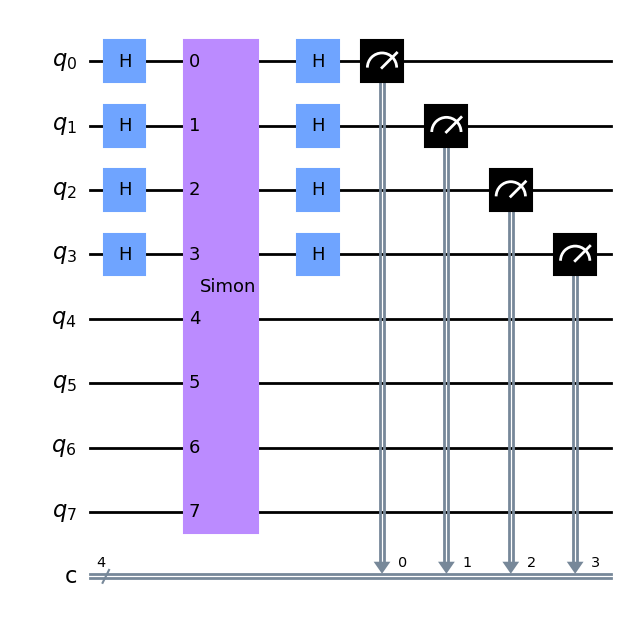

In [4]:

%cd ..

from qc.qiskit_helper import hadamard, measure, simulate

c = '1101'
n = len(c)
qc = QuantumCircuit(2*n, n)
hadamard(qc, n)
qc.append(simon_oracle(c), range(2*n))
hadamard(qc, n)
measure(qc, n)
qc.draw(output='mpl')

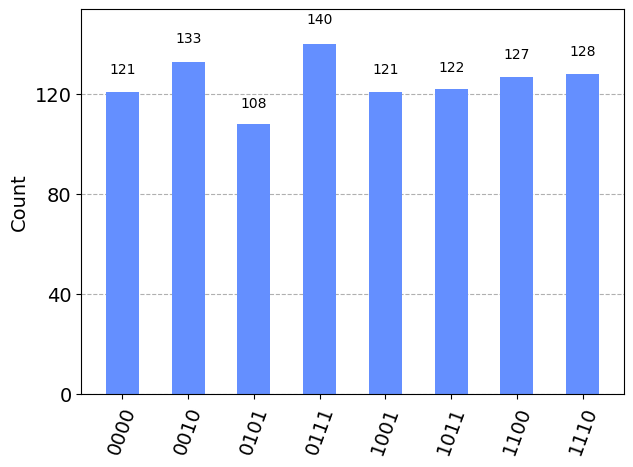

In [5]:
from qiskit.visualization import plot_histogram

results = simulate(qc)
plot_histogram(results)